# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('datasets/all_kindle_review.csv')

In [3]:
data.info

<bound method DataFrame.info of        Unnamed: 0  Unnamed: 0.1        asin  helpful  rating  \
0               0         11539  B0033UV8HI  [8, 10]       3   
1               1          5957  B002HJV4DE   [1, 1]       5   
2               2          9146  B002ZG96I4   [0, 0]       3   
3               3          7038  B002QHWOEU   [1, 3]       3   
4               4          1776  B001A06VJ8   [0, 1]       4   
...           ...           ...         ...      ...     ...   
11995       11995          2183  B001DUGORO   [0, 0]       4   
11996       11996          6272  B002JCSFSQ   [2, 2]       5   
11997       11997         12483  B0035N1V7K   [0, 1]       3   
11998       11998          3640  B001W1XT40   [1, 2]       1   
11999       11999         11398  B003370JUS   [5, 6]       3   

                                              reviewText   reviewTime  \
0      Jace Rankin may be short, but he's nothing to ...   09 2, 2010   
1      Great short read.  I didn't want to put it dow

# Preprocessing Data

In [4]:
#preprocessing the data
data  = data[['reviewText','rating']]
data.info

<bound method DataFrame.info of                                               reviewText  rating
0      Jace Rankin may be short, but he's nothing to ...       3
1      Great short read.  I didn't want to put it dow...       5
2      I'll start by saying this is the first of four...       3
3      Aggie is Angela Lansbury who carries pocketboo...       3
4      I did not expect this type of book to be in li...       4
...                                                  ...     ...
11995  Valentine cupid is a vampire- Jena and Ian ano...       4
11996  I have read all seven books in this series. Ap...       5
11997  This book really just wasn't my cuppa.  The si...       3
11998  tried to use it to charge my kindle, it didn't...       1
11999  Taking Instruction is a look into the often hi...       3

[12000 rows x 2 columns]>

In [5]:
data.isnull().sum()

reviewText    0
rating        0
dtype: int64

In [6]:
data.rating=data.rating.replace([1,2,3],0)
data.rating=data.rating.replace([4,5],1)

c:\Users\User\anaconda3\envs\tf2\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
data.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",0
1,Great short read. I didn't want to put it dow...,1
2,I'll start by saying this is the first of four...,0
3,Aggie is Angela Lansbury who carries pocketboo...,0
4,I did not expect this type of book to be in li...,1


# Cleaning Dataset

In [8]:
#preprocessing the data
from spacy.lang.en.stop_words import STOP_WORDS
import re

def preprocess(text_column):
    text_column = text_column.str.lower() #lowercase
    text_column = text_column.str.replace(r'[^a-zA-Z\s]', '', regex=True) #remove punctuations
    text_column = text_column.str.replace(r'\s+', ' ', regex=True) #remove extra spaces
    #remove stopwords
    text_column = text_column.apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))
    #remove extra spaces
    text_column = text_column.apply(lambda x: " ".join(x.split()))
    #remove emails
    text_column= text_column.apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))
    
    return text_column

In [9]:
data["reviewText"] = preprocess(data["reviewText"])

c:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data["reviewText"]

0        jace rankin short hes mess man hauled saloon u...
1        great short read didnt want read sitting sex s...
2        ill start saying books wasnt expecting conclud...
3        aggie angela lansbury carries pocketbooks inst...
4        expect type book library pleased find price right
                               ...                        
11995    valentine cupid vampire jena ian vampire finds...
11996    read seven books series apocalypticadventure f...
11997    book wasnt cuppa situation man capturing woman...
11998    tried use charge kindle didnt register chargin...
11999    taking instruction look hidden world sexual bd...
Name: reviewText, Length: 12000, dtype: object

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["reviewText"] = data["reviewText"].apply(lambda text: lemmatize_words(text))

c:\Users\User\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
data["reviewText"]

0        jace rankin short he mess man hauled saloon un...
1        great short read didnt want read sitting sex s...
2        ill start saying book wasnt expecting conclude...
3        aggie angela lansbury carry pocketbook instead...
4        expect type book library pleased find price right
                               ...                        
11995    valentine cupid vampire jena ian vampire find ...
11996    read seven book series apocalypticadventure fa...
11997    book wasnt cuppa situation man capturing woman...
11998    tried use charge kindle didnt register chargin...
11999    taking instruction look hidden world sexual bd...
Name: reviewText, Length: 12000, dtype: object

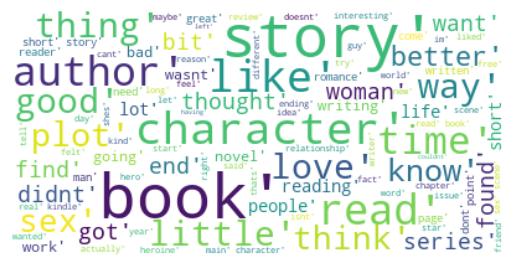

In [13]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image 
import nltk
import matplotlib.pyplot as plt 
#word tokenize the data
def word_tokenize(text):
    #make all text to string
    rating = " ".join(text)
    tokens = nltk.word_tokenize(rating)
    return str(tokens)

#set up wordcloud
def wordcloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


wordcloud(word_tokenize(data['reviewText'][data['rating'] == 0]))

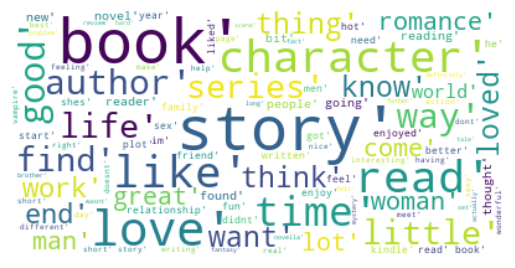

In [14]:
wordcloud(word_tokenize(data['reviewText'][data['rating'] == 1]))

# Tokenization and Splitting The Dataset

In [15]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding


In [16]:
reviews_list = []
for i in range(len(data['reviewText'])):
  reviews_list.append(data['reviewText'][i])
 
sentiment = data['rating']

In [17]:
y = np.array(sentiment)

In [18]:
X_train, X_test,Y_train, Y_test = train_test_split(reviews_list, y, test_size=0.2, random_state = 45)

In [19]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

words_to_index = tokenizer.word_index

In [20]:
def read_glove_vector(glove_vec):
    f = open(glove_vec,'r', errors = 'ignore', encoding='utf8')
    word_to_vec_map = {}
    for line in f:
        w_line = line.split(' ')
        curr_word = w_line[0]
        word_to_vec_map[curr_word] = np.array(w_line[1:],dtype=np.float64)
    return word_to_vec_map

In [21]:
word_to_vec_map = read_glove_vector('datasets/glove.840B.300d.txt')

maxLen = 150

# Embedding The Matrix and Setting up the model

In [22]:
vocab_len = len(words_to_index)
embed_vector_len = word_to_vec_map['moon'].shape[0]

emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    try:
        emb_matrix[index, :] = embedding_vector
    except:
        continue

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False)


In [23]:
from keras.layers import LSTM, Activation, Dropout, Dense, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.models import Model

In [24]:
def review_rating(input_shape):
  X_indices = Input(input_shape)
  embeddings = embedding_layer(X_indices)
  X = LSTM(128, return_sequences=True)(embeddings)
  X = Dropout(0.6)(X)
  X = LSTM(128, return_sequences=True)(X)
  X = Dropout(0.6)(X)
  X = LSTM(128)(X)
  X = Dense(1, activation='sigmoid')(X)
  model = Model(inputs=X_indices, outputs=X)
  return model

In [25]:
model = review_rating((maxLen,))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 300)          10672800  
                                                                 
 lstm (LSTM)                 (None, 150, 128)          219648    
                                                                 
 dropout (Dropout)           (None, 150, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 150, 128)          131584    
                                                                 
 dropout_1 (Dropout)         (None, 150, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584

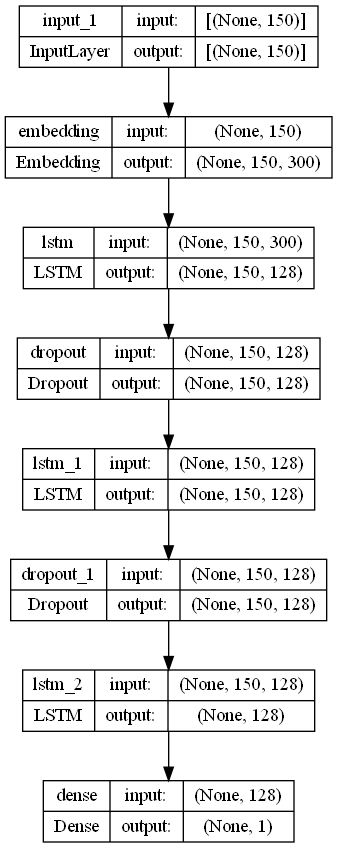

In [26]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Training and Testing The Model

In [27]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.models import Model

adam = Adam(learning_rate = 0.0001)

In [28]:
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')

In [29]:
X_test_indices = tokenizer.texts_to_sequences(X_test)
X_test_indices = pad_sequences(X_test_indices, maxlen=maxLen, padding='post')

In [30]:
model.compile(optimizer=adam,loss='binary_crossentropy', metrics=['accuracy'])

hisory = model.fit(X_train_indices, Y_train, 
          batch_size=64, epochs=15,
          validation_split=0.25,
          callbacks=[
          tf.keras.callbacks.EarlyStopping(
             monitor='val_loss',
             patience=5,
             restore_best_weights=True
          )
          ]
         )

Epoch 1/15
113/113 [==============================] - 56s 470ms/step - loss: 0.6930 - accuracy: 0.5051 - val_loss: 0.6924 - val_accuracy: 0.4917
Epoch 2/15
113/113 [==============================] - 51s 454ms/step - loss: 0.6760 - accuracy: 0.5464 - val_loss: 0.6042 - val_accuracy: 0.7317
Epoch 3/15
113/113 [==============================] - 52s 460ms/step - loss: 0.5766 - accuracy: 0.7315 - val_loss: 0.5442 - val_accuracy: 0.7571
Epoch 4/15
113/113 [==============================] - 51s 452ms/step - loss: 0.5350 - accuracy: 0.7600 - val_loss: 0.5093 - val_accuracy: 0.7837
Epoch 5/15
113/113 [==============================] - 50s 445ms/step - loss: 0.5048 - accuracy: 0.7761 - val_loss: 0.4858 - val_accuracy: 0.7750
Epoch 6/15
113/113 [==============================] - 51s 449ms/step - loss: 0.4801 - accuracy: 0.7811 - val_loss: 0.5220 - val_accuracy: 0.7875
Epoch 7/15
113/113 [==============================] - 49s 436ms/step - loss: 0.4680 - accuracy: 0.7931 - val_loss: 0.4576 - val_ac

In [31]:
model.evaluate(X_test_indices, Y_test)

75/75 [==============================] - 4s 48ms/step - loss: 0.4281 - accuracy: 0.8087


[0.4281177818775177, 0.8087499737739563]

In [32]:
model.save_weights('model_weights.hdf5')

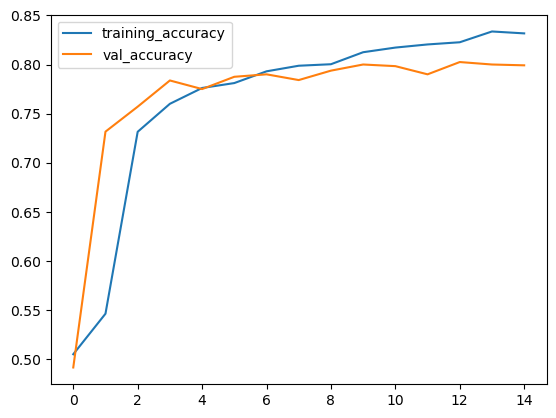

In [33]:
plt.plot(hisory.history['accuracy'], label='training_accuracy')
plt.plot(hisory.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(X_test_indices)


75/75 [==============================] - 4s 45ms/step


In [35]:
y_prediction

array([[0.25698128],
       [0.3837782 ],
       [0.9531217 ],
       ...,
       [0.28841138],
       [0.7835536 ],
       [0.2817742 ]], dtype=float32)

In [36]:
cnf_matrix_test = confusion_matrix(Y_test, y_prediction.round())

In [37]:
Y_test

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [38]:
y_prediction

array([[0.25698128],
       [0.3837782 ],
       [0.9531217 ],
       ...,
       [0.28841138],
       [0.7835536 ],
       [0.2817742 ]], dtype=float32)

In [39]:
cnf_matrix_test

array([[ 919,  284],
       [ 175, 1022]], dtype=int64)

In [40]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[ 919  284]
 [ 175 1022]]


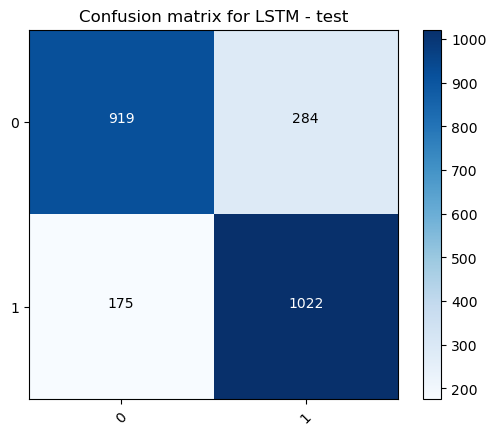

In [41]:
plt.figure()
plot_confusion_matrix(cnf_matrix_test,
                      classes=[0,1],
                      title='Confusion matrix for LSTM - test')

300/300 [==============================] - 13s 45ms/step
Confusion matrix, without normalization
[[3799  998]
 [ 608 4195]]


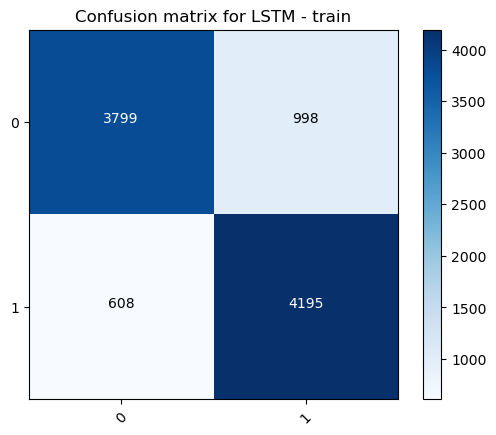

In [42]:

predictions_train = model.predict(X_train_indices)
cnf_matrix_train = confusion_matrix(Y_train, predictions_train.round())
plt.figure()
plot_confusion_matrix(cnf_matrix_train,
                      classes=[0,1],
                      title='Confusion matrix for LSTM - train')